### Set path to original pyNeuroChem. Please change to your own path

In [7]:
import os
os.environ["ANI_HOME"] = "/home/olexandr/ani/NeuroChem-ANI1"

import sys
sys.path.append('/home/olexandr/notebooks/ASE_ANI')
from ani import ANI, ANIatomic

In [8]:
import numpy as np
import  ase
#from ase.build import molecule
#from ase.neb import NEB
from ase.calculators.mopac import MOPAC

#from ase.neb import NEBtools
from ase.io import read, write

import matplotlib
import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

Reading IRC datra for one reaction (Cope rearrangement of citral). Look also in data folder for more examples

In [9]:
traj = read('data/citralOCopeALL.xyz', index=':')

In [10]:
len(traj)

200

In [11]:
energies = []
energies_mop = []
atomic_energies = []
D1 =[]
D2 = []
for geometry in traj:
    geometry.set_calculator(ANI())
    energies.append(geometry.get_potential_energy())
    
    #NOTE:  atomic energieas are computed by subtractive scheme of Oles
    geometry.set_calculator(ANIatomic())
    atomic_energies.append(geometry.get_potential_energy())
    
    # monitoring certain distances relevant to the reaction
    D1.append(geometry.get_distance(0, 1))
    D2.append(geometry.get_distance(6, 9))    
    geometry.set_calculator(MOPAC(method='PM7'))
    energies_mop.append(geometry.get_potential_energy())

In [12]:
energies = np.array(energies)
energies_mop = np.array(energies_mop)
dE_mop =  energies_mop - energies_mop.min()
dE =  energies - energies.min()

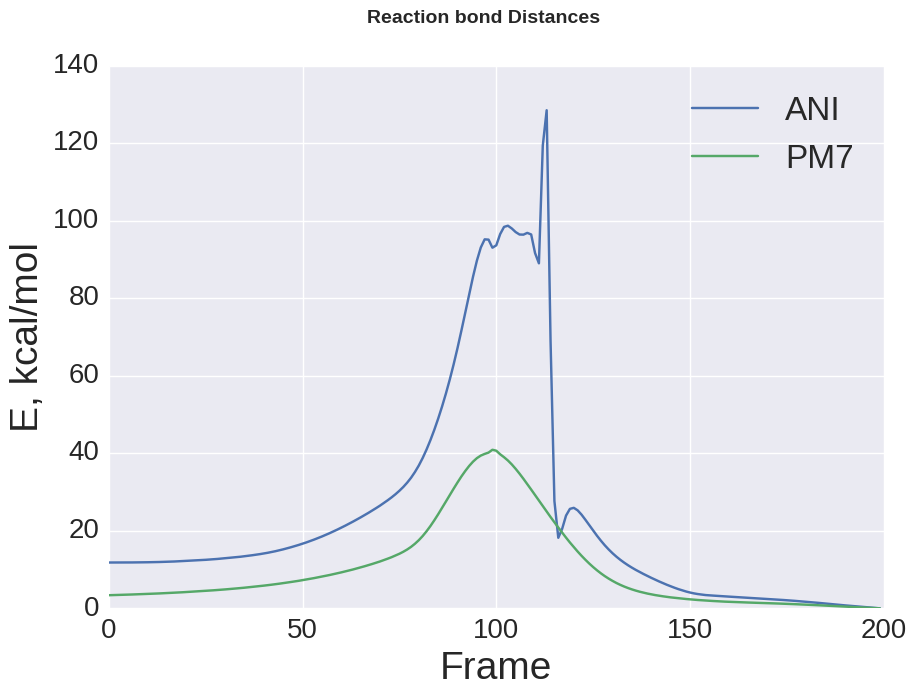

In [13]:
mpl.rcParams['figure.figsize'] = (10.0, 7.0)
fig = plt.figure()
fig.suptitle('Reaction bond Distances', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.plot(dE*23.06, label='ANI')
ax.plot(dE_mop*23.06, label='PM7')
plt.legend(fontsize=24)
sns.set(font_scale=1.0)
plt.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Frame', fontsize=28)
ax.set_ylabel('E, kcal/mol', fontsize=28)

plt.show()

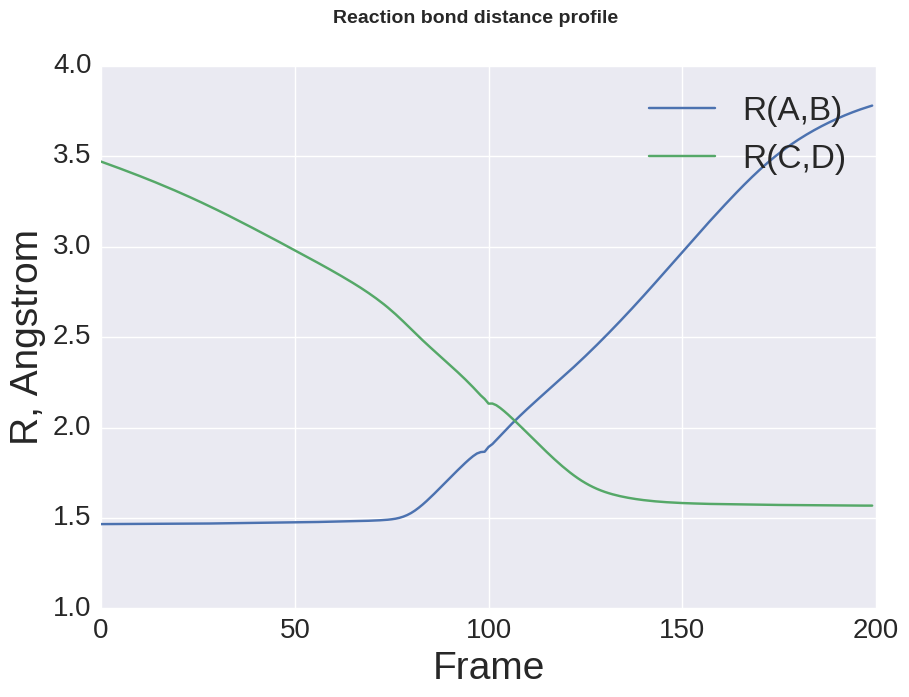

In [14]:
mpl.rcParams['figure.figsize'] = (10.0, 7.0)
fig = plt.figure()
fig.suptitle('Reaction bond distance profile', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.plot(D1, label='R(A,B)')
ax.plot(D2, label='R(C,D)')
plt.legend(fontsize=24)
sns.set(font_scale=1.0)
plt.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Frame', fontsize=28)
ax.set_ylabel('R, Angstrom', fontsize=28)

plt.show()

# NOTE:  atomic energieas are computed by subtractive scheme of Oles

In [18]:
atomic_e =  np.array(atomic_energies)
atomic_e.shape

(200, 27)

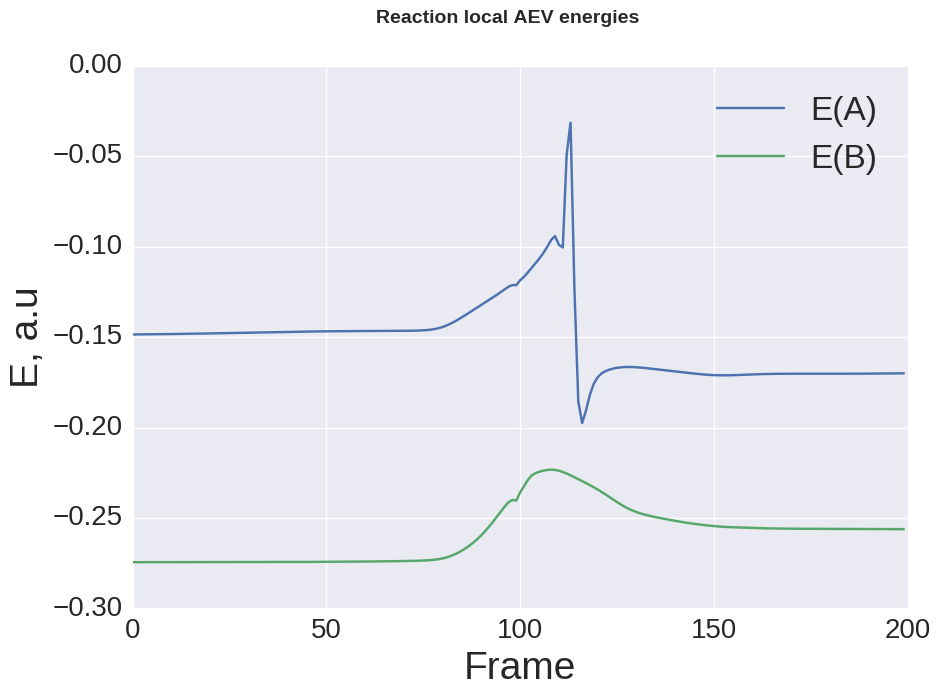

In [19]:
mpl.rcParams['figure.figsize'] = (10.0, 7.0)
fig = plt.figure()
fig.suptitle('Reaction local AEV energies', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.plot(atomic_e[:,0], label='E(A)')
ax.plot(atomic_e[:,1], label='E(B)')
plt.legend(fontsize=24)
sns.set(font_scale=1.0)
plt.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Frame', fontsize=28)
ax.set_ylabel('E, a.u', fontsize=28)

plt.show()

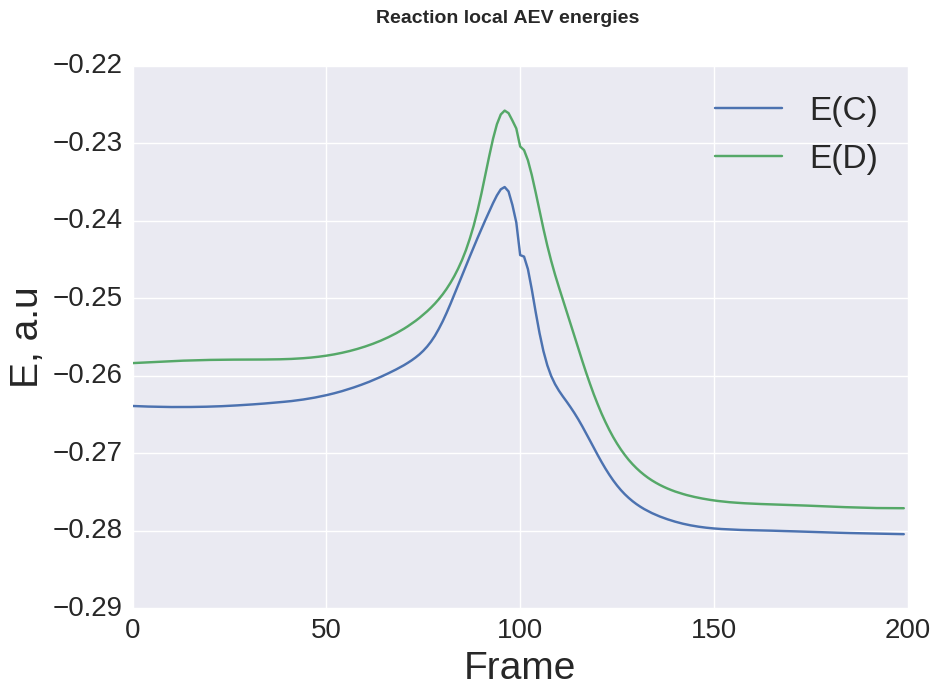

In [20]:
mpl.rcParams['figure.figsize'] = (10.0, 7.0)
fig = plt.figure()
fig.suptitle('Reaction local AEV energies', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.plot(atomic_e[:,6], label='E(C)')
ax.plot(atomic_e[:,9], label='E(D)')
plt.legend(fontsize=24)
sns.set(font_scale=1.0)
plt.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Frame', fontsize=28)
ax.set_ylabel('E, a.u', fontsize=28)

plt.show()